In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import levenberg_marquardt
from matplotlib.pyplot import figure
import heston
from importlib import reload
reload(heston)
from heston import calibrate_heston
import datetime
import matplotlib.dates as mdates
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv(f"../datasets/deribit_options_chain_2022-12-01_OPTIONS.csv")
df = df.drop(columns = ["exchange", "open_interest", 
                    "last_price", "bid_price", "bid_amount", "bid_iv",
                           "ask_price", "ask_amount", "ask_iv", "underlying_index",
                           "delta", "gamma", "vega", "theta" ,"rho"])
currency = "ETH"
ind = [symbol.startswith(currency) for symbol in df.symbol]
df = df[ind].reset_index(drop=True)

In [6]:
df.head()

,symbol,timestamp,local_timestamp,type,strike_price,expiration,mark_price,mark_iv,underlying_price
0,ETH-9DEC22-1400-C,1669852800002000,1669852800011631,call,1400,1670572800000000,0.0146,69.75,1294.5900
1,ETH-16DEC22-1300-P,1669852800011000,1669852800014218,put,1300,1671177600000000,0.0632,74.51,1294.5233
2,ETH-16DEC22-1500-C,1669852800010000,1669852800017777,call,1500,1671177600000000,0.0140,73.44,1294.5233
3,ETH-30DEC22-1400-P,1669852800013000,1669852800018794,put,1400,1672387200000000,0.1325,72.78,1294.2700
4,ETH-2DEC22-1300-C,1669852800013000,1669852800019006,call,1300,1669968000000000,0.0147,69.18,1294.4500


In [9]:
# calibrate base
number_of_dots = 500
kappas, nu_bars, sigmas, rhos, nu0s, errors = [], [], [], [], [], []
a = np.float64(3.0)  # kappa                     |  mean reversion rate
b = np.float64(0.1)  # v_infinity               |  long term variance
c = np.float64(0.25)  # sigma                    |  volatility of volatility
rho = np.float64(0.01)  # rho                    |  correlation between spot and volatility
v0 = np.float64(0.08) # init variance            | initial variance   
start_params = np.array([a, b, c, rho, v0])
print("Optimize first params with random start once")
calibrated_params, first_error = calibrate_heston(df = df, start_params = start_params)

# Get ticks with similar distnce from available data
timestamps = np.linspace(df.timestamp.min(), df.timestamp.max(), number_of_dots)
for timestamp in tqdm(timestamps):
    calibrated_params, error = calibrate_heston(df = df, start_params = calibrated_params, timestamp = timestamp)
    kappas.append(calibrated_params[0])
    nu_bars.append(calibrated_params[1])
    sigmas.append(calibrated_params[2])
    rhos.append(calibrated_params[3])
    nu0s.append(calibrated_params[4])
    errors.append(error)
    
timestamps_hm = [datetime.datetime.fromtimestamp(x/1000000.0) for x in timestamps]

Optimize first params with random start once
Optimized parameters:
('kappa', 0.44983)
('nu_bar', 3.27158)
('sigma', 3.47724)
('rho', -0.39303)
('nu0', 0.64943)


  0%|          | 0/500 [00:00<?, ?it/s]

Optimized parameters:
('kappa', 3.63836)
('nu_bar', 0.0001)
('sigma', 4.27822)
('rho', -0.51474)
('nu0', 0.62696)
Optimized parameters:
('kappa', 2.44536)
('nu_bar', 1.28359)
('sigma', 4.61571)
('rho', -0.37095)
('nu0', 0.65574)
Optimized parameters:
('kappa', 2.39125)
('nu_bar', 1.28539)
('sigma', 4.54402)
('rho', -0.36898)
('nu0', 0.65569)
Optimized parameters:
('kappa', 2.33262)
('nu_bar', 1.30334)
('sigma', 4.53381)
('rho', -0.37079)
('nu0', 0.6568)
Optimized parameters:
('kappa', 2.36356)
('nu_bar', 1.30128)
('sigma', 4.5653)
('rho', -0.37244)
('nu0', 0.65716)
Optimized parameters:
('kappa', 2.36772)
('nu_bar', 1.29969)
('sigma', 4.57017)
('rho', -0.37204)
('nu0', 0.65785)
Optimized parameters:
('kappa', 2.40413)
('nu_bar', 1.29989)
('sigma', 4.62585)
('rho', -0.37291)
('nu0', 0.65696)
Optimized parameters:
('kappa', 2.37642)
('nu_bar', 1.28992)
('sigma', 4.53622)
('rho', -0.37369)
('nu0', 0.66006)
Optimized parameters:
('kappa', 2.43518)
('nu_bar', 1.27413)
('sigma', 4.5655)
('rh

Optimized parameters:
('kappa', 2.33755)
('nu_bar', 1.29825)
('sigma', 4.49863)
('rho', -0.36888)
('nu0', 0.65715)
Optimized parameters:
('kappa', 2.33331)
('nu_bar', 1.3005)
('sigma', 4.50385)
('rho', -0.36938)
('nu0', 0.65705)
Optimized parameters:
('kappa', 2.34297)
('nu_bar', 1.29833)
('sigma', 4.50526)
('rho', -0.3689)
('nu0', 0.65644)
Optimized parameters:
('kappa', 2.35161)
('nu_bar', 1.29731)
('sigma', 4.51413)
('rho', -0.36874)
('nu0', 0.65635)
Optimized parameters:
('kappa', 2.32627)
('nu_bar', 1.29982)
('sigma', 4.48227)
('rho', -0.36855)
('nu0', 0.65631)
Optimized parameters:
('kappa', 2.31354)
('nu_bar', 1.2994)
('sigma', 4.46309)
('rho', -0.36747)
('nu0', 0.65592)
Optimized parameters:
('kappa', 2.31453)
('nu_bar', 1.29815)
('sigma', 4.45733)
('rho', -0.36701)
('nu0', 0.65569)
Optimized parameters:
('kappa', 2.31548)
('nu_bar', 1.29867)
('sigma', 4.45874)
('rho', -0.36741)
('nu0', 0.65543)
Optimized parameters:
('kappa', 2.31764)
('nu_bar', 1.29698)
('sigma', 4.45637)
('r

Optimized parameters:
('kappa', 2.33378)
('nu_bar', 1.28761)
('sigma', 4.42846)
('rho', -0.365)
('nu0', 0.65383)
Optimized parameters:
('kappa', 2.30987)
('nu_bar', 1.28917)
('sigma', 4.39726)
('rho', -0.36416)
('nu0', 0.65327)
Optimized parameters:
('kappa', 2.30482)
('nu_bar', 1.29219)
('sigma', 4.40568)
('rho', -0.36492)
('nu0', 0.65393)
Optimized parameters:
('kappa', 2.27595)
('nu_bar', 1.2963)
('sigma', 4.37372)
('rho', -0.36468)
('nu0', 0.6535)
Optimized parameters:
('kappa', 2.18109)
('nu_bar', 1.31259)
('sigma', 4.30022)
('rho', -0.36332)
('nu0', 0.65401)
Optimized parameters:
('kappa', 2.15924)
('nu_bar', 1.31377)
('sigma', 4.26733)
('rho', -0.36305)
('nu0', 0.65385)
Optimized parameters:
('kappa', 2.18016)
('nu_bar', 1.31015)
('sigma', 4.27016)
('rho', -0.36215)
('nu0', 0.65314)
Optimized parameters:
('kappa', 2.33853)
('nu_bar', 1.27913)
('sigma', 4.35718)
('rho', -0.36061)
('nu0', 0.65164)
Optimized parameters:
('kappa', 2.35783)
('nu_bar', 1.27768)
('sigma', 4.37705)
('rh

Optimized parameters:
('kappa', 2.4101)
('nu_bar', 1.26557)
('sigma', 4.40606)
('rho', -0.36057)
('nu0', 0.64067)
Optimized parameters:
('kappa', 2.41812)
('nu_bar', 1.26429)
('sigma', 4.41018)
('rho', -0.36056)
('nu0', 0.63999)
Optimized parameters:
('kappa', 2.40363)
('nu_bar', 1.26745)
('sigma', 4.40705)
('rho', -0.36107)
('nu0', 0.64038)
Optimized parameters:
('kappa', 2.44262)
('nu_bar', 1.25929)
('sigma', 4.4311)
('rho', -0.36014)
('nu0', 0.64037)
Optimized parameters:
('kappa', 2.41152)
('nu_bar', 1.26472)
('sigma', 4.40899)
('rho', -0.36101)
('nu0', 0.64032)
Optimized parameters:
('kappa', 2.44047)
('nu_bar', 1.25644)
('sigma', 4.40411)
('rho', -0.36042)
('nu0', 0.63999)
Optimized parameters:
('kappa', 2.44136)
('nu_bar', 1.25422)
('sigma', 4.39767)
('rho', -0.35978)
('nu0', 0.64029)
Optimized parameters:
('kappa', 2.42322)
('nu_bar', 1.26056)
('sigma', 4.40713)
('rho', -0.36101)
('nu0', 0.64098)
Optimized parameters:
('kappa', 2.38821)
('nu_bar', 1.26896)
('sigma', 4.39036)
('

Optimized parameters:
('kappa', 2.27089)
('nu_bar', 1.27845)
('sigma', 4.28824)
('rho', -0.36261)
('nu0', 0.65758)
Optimized parameters:
('kappa', 2.25978)
('nu_bar', 1.2857)
('sigma', 4.28518)
('rho', -0.36458)
('nu0', 0.65443)
Optimized parameters:
('kappa', 2.34618)
('nu_bar', 1.28066)
('sigma', 4.40273)
('rho', -0.36494)
('nu0', 0.6521)
Optimized parameters:
('kappa', 2.35935)
('nu_bar', 1.27444)
('sigma', 4.39493)
('rho', -0.36511)
('nu0', 0.65403)
Optimized parameters:
('kappa', 2.2789)
('nu_bar', 1.28223)
('sigma', 4.29499)
('rho', -0.36404)
('nu0', 0.6547)
Optimized parameters:
('kappa', 2.30007)
('nu_bar', 1.27781)
('sigma', 4.30589)
('rho', -0.36309)
('nu0', 0.65475)
Optimized parameters:
('kappa', 2.34657)
('nu_bar', 1.2772)
('sigma', 4.38564)
('rho', -0.3643)
('nu0', 0.65261)
Optimized parameters:
('kappa', 2.44455)
('nu_bar', 1.26158)
('sigma', 4.46473)
('rho', -0.36331)
('nu0', 0.64642)
Optimized parameters:
('kappa', 2.39376)
('nu_bar', 1.26576)
('sigma', 4.38921)
('rho'

Optimized parameters:
('kappa', 2.09176)
('nu_bar', 1.33437)
('sigma', 4.15541)
('rho', -0.36569)
('nu0', 0.63533)
Optimized parameters:
('kappa', 2.11424)
('nu_bar', 1.33345)
('sigma', 4.19176)
('rho', -0.36589)
('nu0', 0.63441)
Optimized parameters:
('kappa', 2.1449)
('nu_bar', 1.33184)
('sigma', 4.24794)
('rho', -0.36664)
('nu0', 0.63344)
Optimized parameters:
('kappa', 2.2037)
('nu_bar', 1.31876)
('sigma', 4.29873)
('rho', -0.36633)
('nu0', 0.63444)
Optimized parameters:
('kappa', 2.2242)
('nu_bar', 1.3088)
('sigma', 4.28835)
('rho', -0.36719)
('nu0', 0.63435)
Optimized parameters:
('kappa', 2.25711)
('nu_bar', 1.30004)
('sigma', 4.31363)
('rho', -0.36713)
('nu0', 0.63526)
Optimized parameters:
('kappa', 2.23914)
('nu_bar', 1.301)
('sigma', 4.29654)
('rho', -0.36652)
('nu0', 0.63522)
Optimized parameters:
('kappa', 2.2193)
('nu_bar', 1.30314)
('sigma', 4.2696)
('rho', -0.36645)
('nu0', 0.63497)
Optimized parameters:
('kappa', 2.20566)
('nu_bar', 1.30547)
('sigma', 4.26159)
('rho', 

Optimized parameters:
('kappa', 1.91644)
('nu_bar', 1.40555)
('sigma', 4.1668)
('rho', -0.36801)
('nu0', 0.62853)
Optimized parameters:
('kappa', 1.88696)
('nu_bar', 1.41167)
('sigma', 4.13447)
('rho', -0.36738)
('nu0', 0.62802)
Optimized parameters:
('kappa', 1.88698)
('nu_bar', 1.41007)
('sigma', 4.12708)
('rho', -0.36723)
('nu0', 0.62802)
Optimized parameters:
('kappa', 1.88389)
('nu_bar', 1.41073)
('sigma', 4.1227)
('rho', -0.36718)
('nu0', 0.62809)
Optimized parameters:
('kappa', 1.85754)
('nu_bar', 1.42086)
('sigma', 4.1102)
('rho', -0.36779)
('nu0', 0.62774)
Optimized parameters:
('kappa', 1.83298)
('nu_bar', 1.42171)
('sigma', 4.05998)
('rho', -0.36705)
('nu0', 0.62738)
Optimized parameters:
('kappa', 1.77692)
('nu_bar', 1.4438)
('sigma', 4.04528)
('rho', -0.36952)
('nu0', 0.63319)
Optimized parameters:
('kappa', 1.78318)
('nu_bar', 1.44245)
('sigma', 4.049)
('rho', -0.3702)
('nu0', 0.63358)
Optimized parameters:
('kappa', 1.80995)
('nu_bar', 1.43653)
('sigma', 4.08118)
('rho',

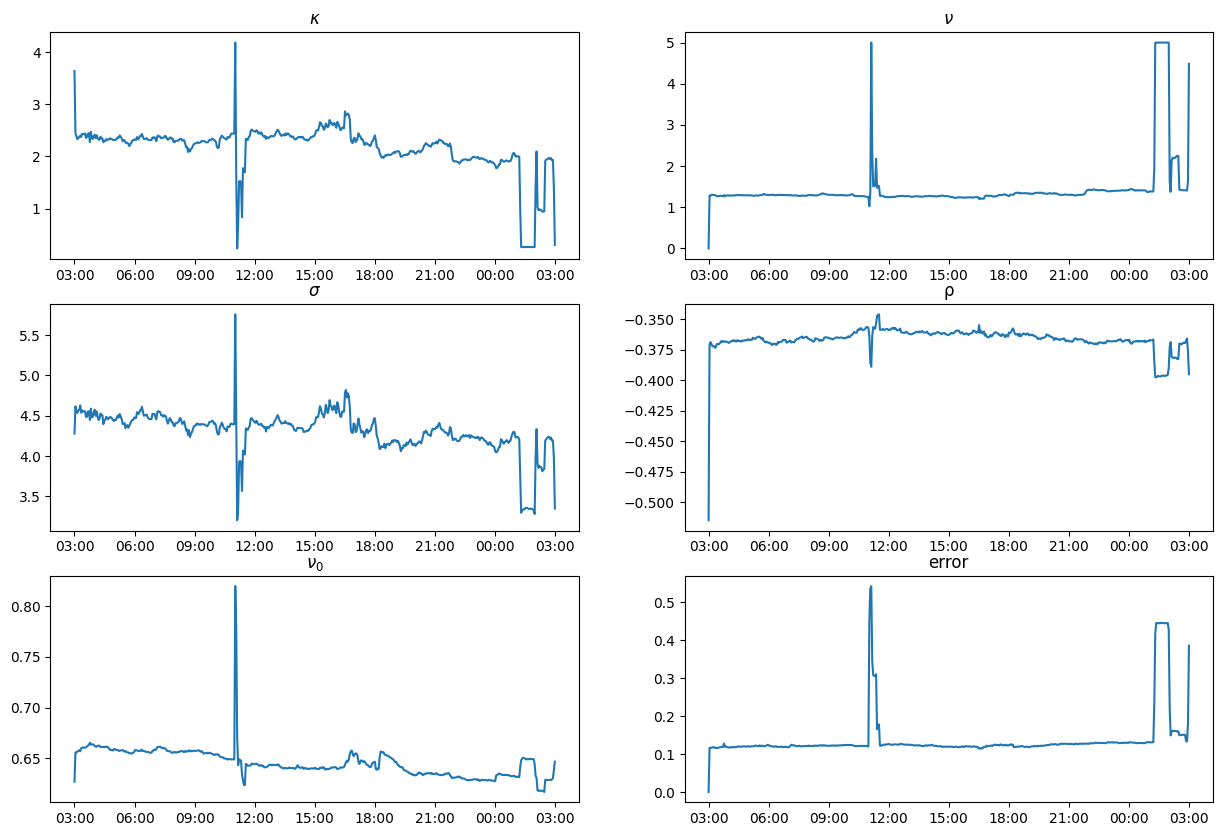

In [10]:
fig, axs =  plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

axs[0, 0].plot(timestamps_hm, kappas)
axs[0, 0].set_title(r"$\kappa$")

axs[0, 1].plot(timestamps_hm, nu_bars)
axs[0, 1].set_title(r"$\nu$")

axs[1, 0].plot(timestamps_hm, sigmas)
axs[1, 0].set_title(r"$\sigma$")

axs[1, 1].plot(timestamps_hm, rhos)
axs[1, 1].set_title("ρ")

axs[2, 0].plot(timestamps_hm, nu0s)
axs[2, 0].set_title(r"$\nu_0$")

axs[2, 1].plot(timestamps_hm, errors)
axs[2, 1].set_title("error")

for i in range(3):
    for j in range(2):
        axs[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()